# Fit- single experiment

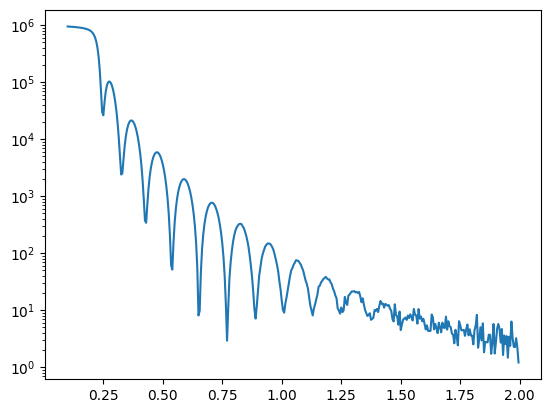

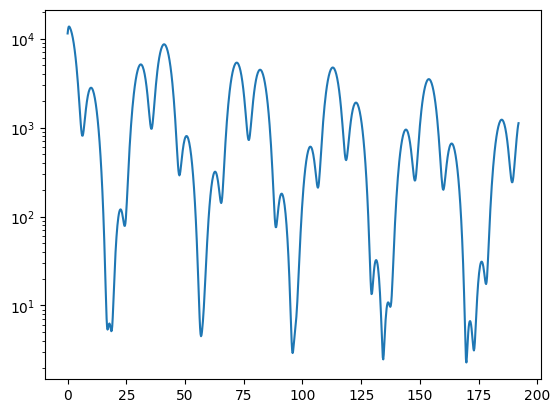

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

angles_data, reflectivity_data = nx.data.Load("reflectivity.txt", 0, 1)

plt.semilogy(angles_data, reflectivity_data)
plt.show()

time_data, time_spec_data = nx.data.Load("time_spectrum.txt", 0, 1)

plt.semilogy(time_data, time_spec_data)
plt.show()

In [2]:
beam = nx.Beam()
beam.LinearSigma()

# setup Fe layer on Silicon wafer
site = nx.Hyperfine(magnetic_field = nx.Var(32, min = 30, max = 35, fit = True, id = "magnetic field"))

site.SetRandomDistribution(target = "mag", type = "2Dsp", points = 401)

mat_Fe = nx.Material.Template(nx.lib.material.Fe)

mat_Fe.density = nx.Var(7.4, min = 7, max = 7.874, fit = True, id = "Fe density")

mat_Fe.hyperfine_sites = [site]

layer_Fe = nx.Layer(thickness = nx.Var(19.5, min = 17, max = 23, fit = True, id = "Fe thickness"),
                    roughness = nx.Var(0.5, min = 0.1, max = 1, fit = True, id = "Fe roughness"),
                    material = mat_Fe)

substrate = nx.Layer(thickness = nx.inf,
                     roughness = nx.Var(0.1, min = 0.0, max = 1, fit = True, id = "Si roughness"),
                     material = nx.Material.Template(nx.lib.material.Si))

sample = nx.Sample(layers = [layer_Fe, substrate],
                   geometry = "r",
                   length = 10,
                   roughness = "a")

In [3]:
# experiment
exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.lib.moessbauer.Fe57)

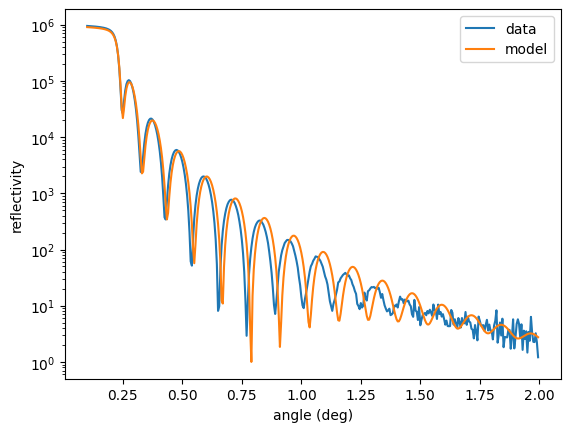

In [4]:
# relfectivity

ref = nx.Reflectivity(experiment = exp,
                      sample = sample,
                      energy = nx.lib.energy.Fe57,
                      angles = angles_data,
                      intensity_data = reflectivity_data,
                      resolution = 0.001,
                      id = "reflectivity")

plt.semilogy(angles_data, reflectivity_data, label = "data")
plt.semilogy(angles_data, ref(), label = "model")
plt.legend()
plt.xlabel('angle (deg)')
plt.ylabel('reflectivity')
plt.show()

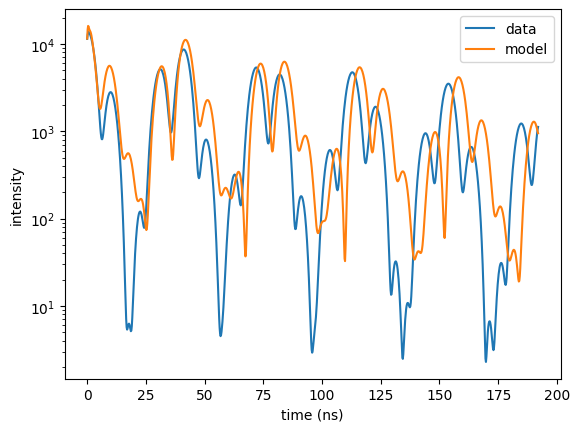

In [5]:
# time spectrum

sample.angle = 0.225

time_spectrum = nx.TimeSpectrum(experiment = exp,
                                time_length = 200,
                                time_step = 0.2,
                                bunch_spacing = 192.2, # PETRA III bunch spacing
                                time_data = time_data,
                                intensity_data =  time_spec_data,
                                id = "time spectrum")

time_axis , intensity = time_spectrum.Calculate()

plt.semilogy(time_data, time_spec_data, label = "data")
plt.semilogy(time_axis, intensity, label = "model")
plt.legend()
plt.xlabel('time (ns)')
plt.ylabel('intensity')
plt.show()

In [6]:
fit = nx.Fit(measurements = [ref, time_spectrum])

#fit.options.method = "Subplex"
fit.options.method = "Newuoa"

fit.Evaluate()


Run Fit instance with id:  

Starting fit with 2 measurement data set(s) and 7 fit parameter(s):

  no. |                           id |       initial value |              min |              max
    0 |                 Refl scaling |              951757 |                0 |      9.51757e+07
    1 |                 Fe thickness |                19.5 |               17 |               23
    2 |                 Fe roughness |                 0.5 |              0.1 |                1
    3 |                   Fe density |                 7.4 |                7 |            7.874
    4 |               magnetic field |                  32 |               30 |               35
    5 |                 Si roughness |                 0.1 |                0 |                1
    6 |                   TS scaling |         1.37079e+06 |                0 |      1.37079e+10

Using 0 equality constraint(s) on parameter(s):

Using 0 inequality constraint(s).


Calling NLopt solver with fit method Ne

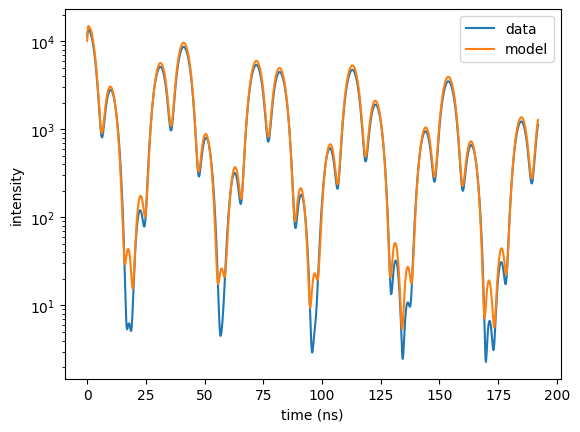

In [7]:
plt.semilogy(angles_data, reflectivity_data, label = "data")
plt.semilogy(angles_data, ref.result, label = "model")
plt.legend()
plt.xlabel('angle (deg)')
plt.ylabel('reflectivity')
plt.show()

plt.semilogy(time_data, time_spec_data, label = "data")
plt.semilogy(time_axis, time_spectrum.result, label = "model")
plt.legend()
plt.xlabel('time (ns)')
plt.ylabel('intensity')
plt.show()

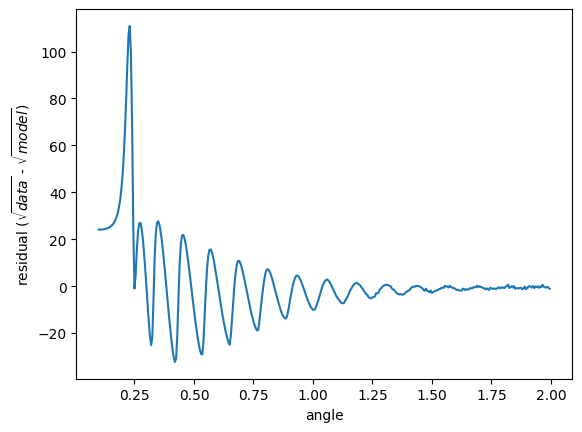

In [8]:
residuals = nx.lib.residual.Sqrt().ResidualFunction(reflectivity_data, ref.result)

plt.plot(angles_data, residuals)
plt.xlabel('angle')
plt.ylabel(r'residual ($\sqrt{data}$ - $\sqrt{model}$)')
plt.show()


Run Fit instance with id:  

Starting fit with 2 measurement data set(s) and 7 fit parameter(s):

  no. |                           id |       initial value |              min |              max
    0 |                 Refl scaling |              951757 |                0 |      9.51757e+07
    1 |                 Fe thickness |                19.5 |               17 |               23
    2 |                 Fe roughness |                 0.5 |              0.1 |                1
    3 |                   Fe density |                 7.4 |                7 |            7.874
    4 |               magnetic field |                  32 |               30 |               35
    5 |                 Si roughness |                 0.1 |                0 |                1
    6 |                   TS scaling |         1.37079e+06 |                0 |      1.37079e+10

Using 0 equality constraint(s) on parameter(s):

Using 0 inequality constraint(s).


Calling NLopt solver with fit method Ne

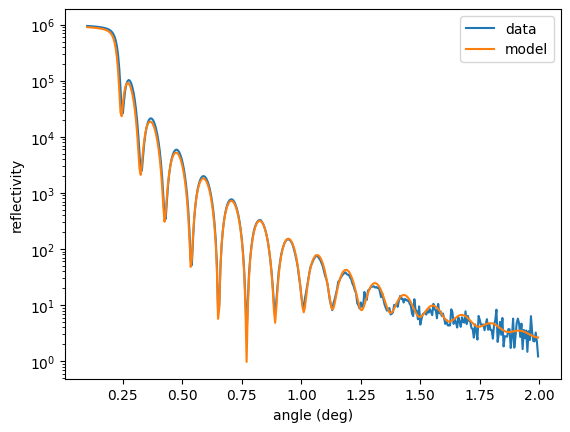

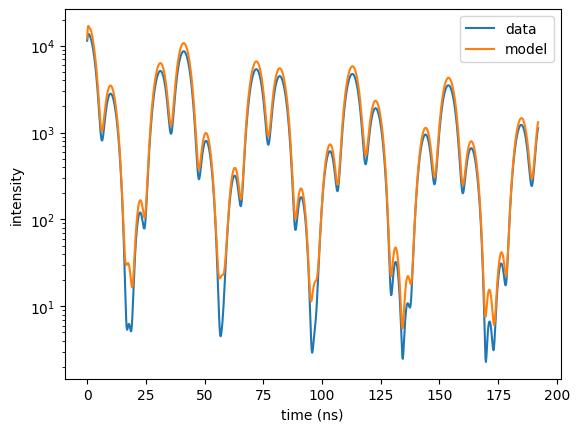

In [9]:
fit.SetInitialVars()

ref.fit_weight = 1e3

fit.Evaluate()

plt.semilogy(angles_data, reflectivity_data, label = "data")
plt.semilogy(angles_data, ref.result, label = "model")
plt.legend()
plt.xlabel('angle (deg)')
plt.ylabel('reflectivity')
plt.show()

plt.semilogy(time_data, time_spec_data, label = "data")
plt.semilogy(time_axis, time_spectrum.result, label = "model")
plt.legend()
plt.xlabel('time (ns)')
plt.ylabel('intensity')
plt.show()